# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры, которые влияют на стоимость объекта недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(
    r'C:\Users\Dell Inspirion 15 #1\JyputerRoot\Проекты по Практикуму\Проект 3\real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Описание данных

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
**balcony** — число балконов  
**ceiling_height** — высота потолков (м)  
**cityCenters_nearest** — расстояние до центра города (м)  
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
**first_day_exposition** — дата публикации  
**floor** — этаж  
**floors_total** — всего этажей в доме  
**is_apartment** — апартаменты (булев тип)  
**kitchen_area** — площадь кухни в квадратных метрах (м²)  
**last_price** — цена на момент снятия с публикации  
**living_area** — жилая площадь в квадратных метрах (м²)  
**locality_name** — название населённого пункта  
**open_plan** — свободная планировка (булев тип)  
**parks_around3000** — число парков в радиусе 3 км  
**parks_nearest** — расстояние до ближайшего парка (м)  
**ponds_around3000** — число водоёмов в радиусе 3 км  
**ponds_nearest** — расстояние до ближайшего водоёма (м)  
**rooms** — число комнат  
**studio** — квартира-студия (булев тип)  
**total_area** — общая площадь квартиры в квадратных метрах (м²)  
**total_images** — число фотографий квартиры в объявлении  

In [4]:
# Просмотрим общую информацию о датафреме
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


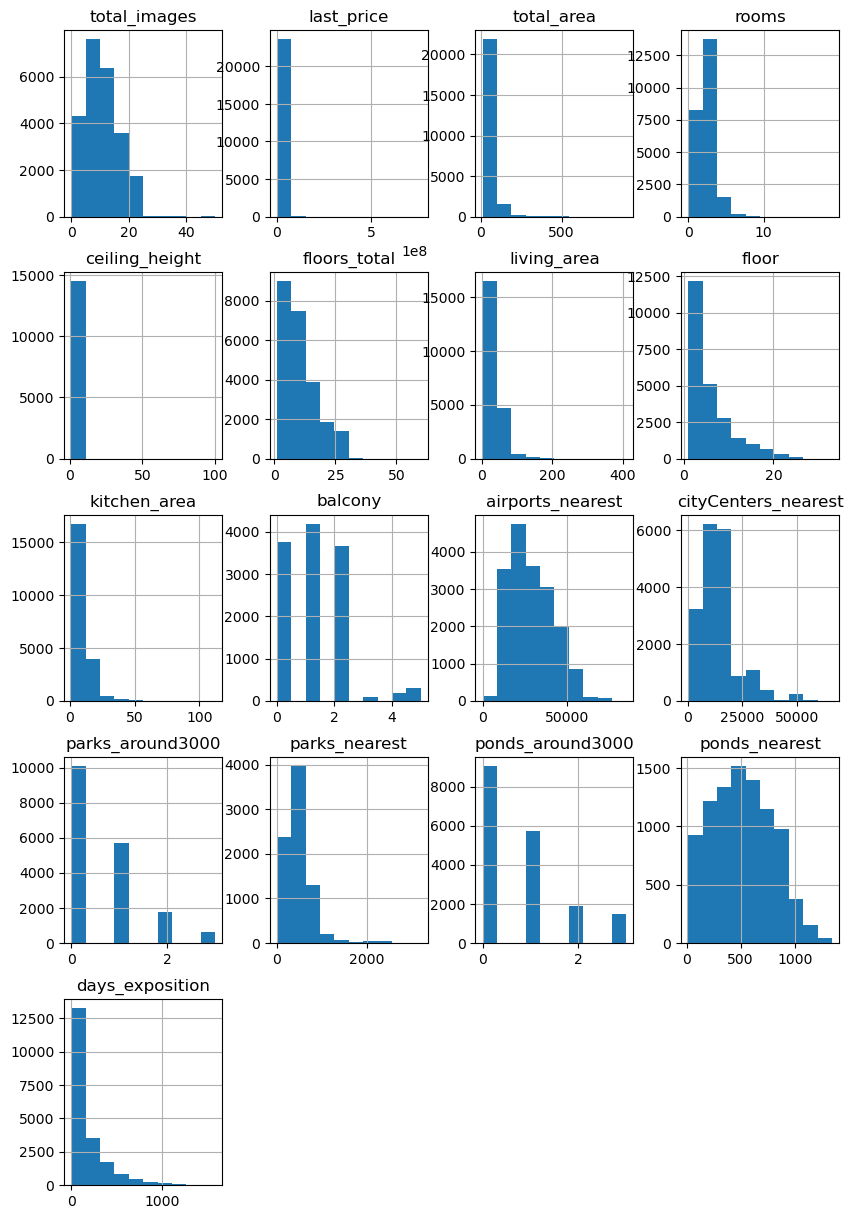

In [5]:
# визуализируем данные в столбцах
data.hist(figsize=(10, 15));

In [6]:
data.shape

(23699, 22)

In [7]:
data.dtypes.value_counts()

float64    14
int64       3
object      3
bool        2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Предоставленный датафрейм состоит из 23699 строк и 22 столбцов.  
Более чем в половине столбцов содержатся пропуски.
В датафрейме значения представвлены четырмя типами данных: *float64*, *object*, *int64*, *bool*

**Краткий анализ гистограмм**


`total_images` - гистограмма представляет собой логарифмическое распределение. Можно сделать вывод, что в столце хранятся адекватные данные. Длинный правый хвост говорит о наличии выбросов, но вполне возможно что кто-то выложил 50 фотографий своей квартиры. 
 
`last_price` -  не меняя масштаб гистограммы, можно отметить, что имеется один пик и положительная симметрия. "Проблемы" с масштабом могут быть вызваные выбросами.  

`total_area` - отметим, что гистограмма имеет один пик и длинный правый "хвост". Можно сказать что площадь большинства квартир ограничена неким средним значением, а правый хвост определяет элитное жильё с большой площадью.  

`rooms` - мы видим частный случай нормального распределения. Большинсво квартир имеют 4 и менее комнат. Длинный правый "хвост" говорит о наличии в наших данных дорогих многокомнатных квартир.  


`ceiling_height` - по гистограмме заметно, что высоты потолков имеют некое среднее значение для большинства квартир, так как имеется один пик. Но так как ось абсцисс растянута влоть до 100 метров, можно сказать что в данных имеются выбросы.  

`floors_total` - по гистограмме можно сказать, что данные скорее всего адекватные. Имеется один пик и плавный правый хвост, т.к. отрицательных значений нет. Растянутость оси до 50 этажей сигнализирует о наличии выбросов.  

`living_area` - гистограмма напиминает своим видом гистограмму для `total_area`, т.е. мы имеем один пик и длинный правый хвост. Выводы о хранящихся данных для этих столбцов аналогичны. Есть некое среднее значение для жилой площади, хвост говорит о выбросах.  

`floor` - один пик, правый хвост. Выглядят данные адекватно. Большинство квартир находится ниже 10-го этажа примерно.

`kitchen_area` - так же один пик и длинный правый хвост. Данные в целом корректны, но имеются выбросы, из-за которых ось абсцисс сильно растянута.  

`balcony` - количество квартир без балконов, с одним и двумя балконами сопоставимо. В данном столбце нет аномально больших выбросов.  

`airports_nearest` - можем наблюдать гистограмму с положительной ассиметрией. Так же мы имеем один пик. Картина достаточно реалистичная. Опять же, более длинный правый хвост говорит о том, что имеются очень удаленные квартиры от аэропорта, вплоть до 50 км и дальше. Но это вполне может быть

`cityCenters_nearest` - имеем резкий провл после пикового значения, возможно там заканчивается черта города.  Скачки после провалов могут быть оправданы тем, что между двумя населенными пунктами могут быть пустыри, и квартир там нет. Потом появляется какой-либо населенный пункт (например на расстоянии 50 км), достаточно крупный, чтобы отобразиться на картине скачком.

`park_around3000` - наблюдаем частный случай нормального распределения. Похоже что даже выбросов нет.  
 
`parks_nearest` - имеем один пик, что уже хорошо. Провал справа попытаемся объяснить тем, что после некой величины указывать "близость" парка уже как-то неудобно, да и "близостью" уже не назовешь. В намшем случае это примерно полтора километра.


`ponds_around3000` - оличная картинка, реалистичная.  

`ponds_nearest` - гистограмма ближе всего к нормальному распределению. Выглядит реалистично.  


`days_exposition` - можно увидеть гамма-распределение. Есть один пик. Достаточно реалистично.

**Проверим наличие явных дубликатов**

In [9]:
duplicated_data = data[data.duplicated()]
duplicated_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Повторяющихся строк в датафрейме нет.

### Предобработка данных

#### 1. Определим в каких столбцах есть пропуски

In [10]:
# Проверим количество пропусков в столбцах
print(data.isna().sum().sort_values(ascending=False))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


In [11]:
# Проверим долю пропусков в каждом столбце
data.isna().sum().sort_values(ascending=False) * 100 / len(data)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

#### Причины пропусков


**is_apartment** - 20924 пропусков в столбце "апартаменты". Возможно, что большое количество пропусков вызвано тем, что апартаменты имеют меньшую стоимость по сравнению с квартирой, и продавец заведомо не указал данную информацию, чтобы привлечь больше внимания к объявлени. Пока непонятно как заполнять данные пропуски.


**parks_nearest** - 15620 пропусков в столбце "расстояние до ближайшего парка (м)". Суда по большому количеству пропусков, данный параметр не является картографическим и заполняется продавцом собственноручно. Большое количество пропусков может быть связано с тем, что продавцу лень заполнять необязательные параметры, особенно если он не является привлекательным. Можно предположить, что не указано расстояние в тех случаях, когда парк далеко. Посмотрим насколько этот параметр будет важен в дальнейшей работе, пока не будем его заполнять. В дальнейшем, можно заполнить его значением, котрое бы указывала на то, что парка нет рядом, например словом "нет" или "нет поблизости", для большей наглядности в инфографике. Либо взять максимальное значение расстояния до парка в нашем датафрейме 3,2 км. и заполнить пропуски знаением "более 3200 метров" или более "3.2 км".

**ponds_nearest** - 14589 пропусков в столбце "расстояние до ближайшего водоёма (м)". Аналогично с расстояниями до парка. При необходимости, можно заполнить значением "нет поблизости".

**balcony**  - 11519 пропусков в столбце "число балконов". Скорее всего в данных квартирах нет балкона. Наличие былкона увеличивает привлекательность недвижимости, было бы странно не указывать его наличие. Заполним нулями пропущенные значения.

**ceiling_height** - 9195 пропусков в столбце "высота потолков (м)". Предположим, что незаполнены значения в тех случаях, когда высота потолков стандартна. Заполнить данные пропуски можно как раз типовыми значениями высоты потолков. (2.5 м.)

**airports_nearest** - 5542 пропусков в столбце "расстояние до ближайшего аэропорта в метрах (м)". Помимо ответственных продавцов, данный параметр заполняют тогда, когда это значение небольшое, например квартира находится в южных районах города. В данном случае можно сакцентированить на этом внимание. В остальных же случаях это не такая значимая информация, вряд ли она значительно скажется на цене. Можно заполнить средним значеними.

**cityCenters_nearest** - 5519 пропусков в столбце "расстояние до центра города (м)". По опыту, можно сказать, что это один из самых весомых показателей, которые влияют на стоимость квартиры. С высокой долей вероятности, он так же чаще указывается тогда, когда является привлекательным. Так как этот параметр напрямую будет коррелировать со стоимостью квартир, то пока непонятно какими данными его заполнять. Пропуски в данном столбце встречаются более чем в 20% объявлений, поэтому исключить эти данные мы не можем. Пока что есть только одна идея - заполнить средним, либо не заполнять вовсе.


**ponds_around3000** - 5518 пропусков в столбце "число водоёмов в радиусе 3 км". Не заполненно, скорее всего по тем же причинам, что и ранее: показатель непривлакателен. Заполнять не будет, при необходимости заполним нулевыми значениями.


**parks_around3000** - 5518 пропусков в столбце "число парков в радиусе 3 км". Абсолютно аналогично предыдущему пункту. 

**days_exposition** - 3181 пропусков в столбце "сколько дней было размещено объявление (от публикации до снятия)". Похоже, что эти данные не выгрузились. Таких данных немного (около 13%). Заменим пропуски средним или медианным значением.

**kitchen_area** - 2278 пропусков в столбце "площадь кухни в квадратных метрах (м²)". Может быть не заполнено, если кухня очень маленькая, либо если это квартира-студия. Можно заполнить средним значением для маленьких квартир.
 

**living_area** - 1903 пропусков в столбце "жилая площадь в квадратных метрах (м²)". Очень важный показатель в ценообразовании квартиры. Пропуски могут быть вызваны ошибкой выгрузки, либо забывчивостью продавца. Относительно не много таких случаев. Пока непонятно как заполнить пропуски.


**floors_total** - 86 пропусков в столбце "всего этажей в доме". Менее привлекательны квартиры на первом этаже здания, но это не сильно сказывается на их стоимости. Возможна ошибка выгрузки, если этот параметр обязателен. Можно заполнить средним значением для населенного пункта. Таких значений менее процента, поэтому данные значения можно не заполнять вовсе.

**locality_name** - 49 пропусков в столбце "название населённого пункта". Пропусков в столбце менее процента. Если пропуски оставить, то это практически не скажется на общей картине.


#### Обработка пропусков

In [12]:
# Проверим какие данные хранятся в столбце "is_apartment"
print(data['is_apartment'].value_counts())
print(f'Всего записсей: {data.shape[0]}')

False    2725
True       50
Name: is_apartment, dtype: int64
Всего записсей: 23699


In [13]:
# Посчитаем количество аппартаментов от общего числа объявлений
len(data[data['is_apartment'] == True])/data.shape[0]*100

0.21097936621798388

Получается, что из 23699 строк как "апартаменты" указаны лишь 50 объектов. В целом в столбце 88% пропусков. 
Если посмотреть на другом популярном агрегаторе, например "Циан", то на данный момент всего объявленей о продаже квартир в Санкт-Петербурге и ЛО: 45 810, из них по фильтру "только аппартаменты": 3556 объявлений, получается что 7,8% из всех объявлений - это объявления о продаже апартаментов.
В нашем же случае: получается что процент аппартаментов от общего числа менее 1%.
    </div>

Отсюда можно сделать вывод, что скорее всего в данных `is_apartment` есть ошибка, эти данные неправдоподобны. Нет понимания как их заполнять.  
Но так как доля пропусков составляет 88%, заполним пропуски значениями False, то есть будем считать, что если не указано явно, то продается квартира.




In [14]:
data['is_apartment'].fillna(False, inplace=True)
print(data['is_apartment'].isna().sum())

0


Если посмотреть на количество пропусков в столбцацах `airports_nearest`, `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`, то можно заметить, что количество пропусков либо одинаково, либо очень похоже.
Можно предположить, что пропуски в этих столбцах находятся в одних и тех же строках.

In [15]:
# Проверим количество пропусков во всех вышеперечисленных столбцах одновременно

len(data[(data['airports_nearest'].isna())
         & (data['cityCenters_nearest'].isna())
         & (data['ponds_around3000'].isna())
         & (data['parks_around3000'].isna())]
    )

5518

Можно сделать вывод: 5518 строк имеют пропуски сразу в четырех столбцах `airports_nearest`, `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`.
Однозначно можно сказать, что для 5518 объявлений недостаточно данных и пока нет понимания как их можно заполнить.  
Вариант с заполнением "нет поблизости" (аэропортов, прудов, парков) оставим на будущее, если это потребуется. Заполнять средними или медианными значениями пока не будем, так как совокупность всех этих показателей, особенно удаленность от центра - слишком значимо для ценообразования.

На основании ранее сделанных выводов заменим пропуски в столбце `balcony` на нули.

In [16]:
# Проверим количество пропусков
data['balcony'].isna().sum()

11519

In [17]:
# Заполним значения нулями, т.е. балкона нет
data['balcony'].fillna(0, inplace=True)

In [18]:
# Проверим количество пропусков, должно быть 0
data['balcony'].isna().sum()

0

In [19]:
# Проверим информаци о данных в столбце "ceiling_height"
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Мы видим, что минимальное значение высоты потолков 1 метр - неправдоподобно, так же как и максимальное в 100 м. Заменим пропущенные и неправдоподобные медианными значениями.  
Минимальной нормой высоты потолка в России считается 2,4 метра.

In [20]:
# Проверим количество кваритр, в которых высота потолков ниже минимальной нормы в России

len(data[data['ceiling_height'] < 2.4])

21

In [21]:
# заменим значения на 2,4

data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = 2.4

In [22]:
len(data[data['ceiling_height'] < 2.4])

0

Высота потолков "сталинок" сожет достигать 3.5 метра. В элитных домах она может достигать 4-х метров. 

In [23]:
len(data[data['ceiling_height'] > 4])

75

75 квартрир с высотой потолков более 4 м - достаточно правдоподобно. 
Мы видели, что максимальное значение потолка равно 100 метров, что неправдоподобно.
Ограничимся максимальной высотой потолка 10 метров и проверим данные.


In [24]:
len(data[data['ceiling_height'] > 10])

25

In [25]:
data[data['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,False,...,5.7,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,False,...,5.2,0.0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Как мы можем видеть, квартиры с потолком выше 10 метров стоят не особо много, скорее всего ошибка в данных. Таких квартир всего 26. Похоже, что в данных есть ошибка на порядок, и высоту данных квартир необходимо поделить на 10.

In [26]:
data.loc[(data['ceiling_height'] > 10), 'ceiling_height'] = data.loc[(
    data['ceiling_height'] > 10), 'ceiling_height'] / 10

In [27]:
len(data[data['ceiling_height'] > 10])

0

In [28]:
# Теперь снова проверим, не появилось ли квартир с потолком ниже 2.4
data[data['ceiling_height'] < 2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,1.40,14.0,32.4,5,False,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,2.00,17.0,53.2,14,False,...,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,2.26,14.0,35.0,11,False,...,13.0,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,1.03,16.0,15.5,15,False,...,NaN,0.0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


У нас появились значения с высотой потолков ниже нормы в России.
Таких значения всего 4.
Обработаем их вручную.

In [29]:
# Для строк 15061 и 22309 допустим, что это это пентхауз с высотой потолка 14  и 10.3 метра соответственно
data.loc[15061, 'ceiling_height'] = 14
data.loc[22309, 'ceiling_height'] = 10.3
# Оставшиеся два значения приведем к норме в России
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = 2.4

In [30]:
# Проверим
len(data[data['ceiling_height'] < 2.4])

0

Проверим наличие пропусков в `days_exposition`(количество дней от размещения до снятия), заполним пропуски средними значениями, так как похоже что пропуски вызваны ошибкой выгрузки, потому что этот параметр, как правило обязательный, он считается автоматически.

In [31]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [32]:
data['days_exposition'].isna().sum()

3181

In [33]:
data['days_exposition'].mean()  # среднее значение

180.88863436982163

In [34]:
data['days_exposition'].median()  # медианное значение

95.0

In [35]:
# Приведем дату подачи объявления к типу datetime
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [36]:
# опредеим год подачи объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [37]:
# выберем только те данные, в которых пропуски в 'days_expositions'
# потом сводную таблицу сделаем
# для values подойдет любой столбец без пропусков
(data
    .query('days_exposition.isnull()')
    .pivot_table(index='year_exposition', values='total_images', aggfunc='count', )
    .rename(columns={"total_images": "Количество пропусков"})
 )

,Количество пропусков
year_exposition,
2014,18
2015,70
2016,67
2017,271
2018,959
2019,1796


In [38]:
data.pivot_table(index='year_exposition', values='total_images',
                 aggfunc='count').rename(columns={"total_images": "Всего строк"})

,Всего строк
year_exposition,
2014,137
2015,1191
2016,2783
2017,8190
2018,8519
2019,2879


Проанализировав по годам количество объявлений и количество пропусков в них, можно пронаблюдать, что чем ближе дата размещения к текущей дате (2019 год), тем больше пропусков в столбце `days_exposition`, который показывает сколько дней прошло от размещения до снятия объявления. Соответственно, можно сделать вывод, что наличие пропусков в столбце может означать, что данные объявления до сих пор не сняты, и, вероятно, что квартиры ещё не проданы. Поэтому данные пропуски заполнять не будем.

Обработка пропусков `kitchen_area`

In [39]:
data['kitchen_area'].isna().sum()

2278

Проверим сколько студий в этом значении

In [40]:
len(data[(data['rooms'] == 0) & (data['kitchen_area'].isna())])

197

In [41]:
# Найдем долю студий в пропусках по площади кухни
len(data[(data['rooms'] == 0) & (data['kitchen_area'].isna())]) / \
    data['kitchen_area'].isna().sum()*100

8.647936786654961

Получается, что всего 8% от пропусков данных в столбце `kitchen_area` приходися на студии. Это значит, что гипотеза о том, что площадь кухни не указана, потому что в студии нет такого разделения - несостоятельна.

Проверим сколько в среднем `kitchen_area` составляет в `total_area`

In [42]:
kitchen_and_total_ratio = data['kitchen_area'] / data['total_area']

In [43]:
# Найдем медианное значение
kitchen_and_total_ratio.median()

0.1724137931034483

Примерно 17% от общей площади квартиры составляет площадь кухни.
Заполним пропуски в `kitchen_area` в таком же соотношении.

In [44]:
data['kitchen_area'].fillna(
    data['total_area']*kitchen_and_total_ratio.median(), inplace=True)

In [45]:
data['kitchen_area'].isna().sum()

0

Аналогичную процедуру для `living_area` проводить будет неправильно, т.к. в общую площадь входит не тольуо жилая, но так же площадь сан.узлов, кладовых, балконов и прочих вспомогательных помещений.

Пропуски в `floors_total`

Если [верить](https://ru.wikipedia.org/wiki/%D0%9A%D0%BD%D1%8F%D0%B7%D1%8C_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9D%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_(%D0%B6%D0%B8%D0%BB%D0%BE%D0%B9_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81) Википедии, то самый высокий жилой дом в Санкт-Петербурге в 37 этажей.

In [46]:
data[data['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,2018
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,2018


Всего две квартиры, которые находятся выше 37-го этажа. Исключим эти две строки.

In [47]:
data.drop(data.loc[data['floors_total'] > 37].index, inplace=True)
data.shape

(23697, 23)

In [48]:
data['floors_total'].isna().sum()

86

Удалим пропуски в `floors_total`, так как таких значений меньше одного процента от общего количества объявлений.

In [49]:
data.drop(data[data['floors_total'].isna()].index, inplace=True)

In [50]:
data['floors_total'].isna().sum()

0

Пропуски в `locality_name` удалим, так как таких значений всего 0.2%

In [51]:
data.dropna(subset=['locality_name'], inplace=True)

In [52]:
data['locality_name'].isna().sum()

0

Выведем столбцы, в которых остались пропуски

In [53]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15535
ponds_nearest           14528
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
ponds_around3000         5500
parks_around3000         5500
days_exposition          3171
living_area              1865
total_images                0
balcony                     0
locality_name               0
open_plan                   0
kitchen_area                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
year_exposition             0
dtype: int64

**Результаты работы с пропусками:**  
Расстояния до парков и прудов (`parks_nearest` и `ponds_nearest`) заполнить числовыми значениями не представляется возможным.  
Как говорилось ранее, пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `ponds_around3000`, `parks_around3000` почти все принадлежат одним и тем же строкам. Т.е. в данных объявлениях высокая степень неполноты информации и заполнение пустых значений усредненными могут сильно исказить картину. 

#### 2. Рассмотрим типы данных в каждом столбце

In [54]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23563 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int64         
 1   last_price            23563 non-null  float64       
 2   total_area            23563 non-null  float64       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int64         
 5   ceiling_height        14479 non-null  float64       
 6   floors_total          23563 non-null  float64       
 7   living_area           21698 non-null  float64       
 8   floor                 23563 non-null  int64         
 9   is_apartment          23563 non-null  bool          
 10  studio                23563 non-null  bool          
 11  open_plan             23563 non-null  bool          
 12  kitchen_area          23563 non-null  float64       
 13  balcony         

**Столбцы, в которых изменим типы данных:**

**last_price** - можно изменить на целое число, т.к. копейки в стоимости квартиры несущественны. 

**total_area** - можно округлить до одного знака после запятой, сотые доли в площади квартиры не повлияют на решение о покупке.

**first_day_exposition** - это дата, соответственно необходимо перевести к типу datetime;  

**ceiling_height** - округлим до 1го знака после запятой (согласитесь, есть разница между потолком 2,4 метра и 2,9 метра);  

**floors_total** - количество этажей - всегда целое число.

**balcony** - количество балконов - всегда целое цисло.

**living_area** - можно округлить до одного знака после запятой.

**kitchen_area** - можно округлить до одного знака после запятой. 

**airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** -  расстояния указаны в метрах, переведем в целое число. 

**days_exposition** - сколько дней продавали квартиру - целое число.

P.S. Если говорить ещё более конкретно, то во всех перечисленных выше случаях, где мы планируем изменить тип данных на **int** (целое число), тип данны можно изменить на **uint** (беззнаковое целое число), т.к. все целочисленные показатели в нашей таблице не могут быть отрицательными.

P.S.S. Прежде чем приводить типы данных к более подходящим, создадим новые столбцы в датафрейме, которые требуются по условию задачи.

В шаге №3 требуется:

*Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:  
цена одного квадратного метра;  
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
месяц публикации объявления;  
год публикации объявления;  
тип этажа квартиры (значения — «‎первый», «последний», «другой»);  
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).*

Столбец с расстоянием до центра города в километрах добавим на более поздних этапах, после того как исключим дубликаты в названии населенных пунктов.

Добавим столбец с ценой одного квадратного метра, назовем его: `price_for_m2`

In [55]:
data['price_for_m2'] = data['last_price'] / data['total_area']

Добавим столбец с днем недели публикации.  
Для этого нам понадобится перевести столбец `first_day_exposition` к типу datetime

In [56]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Добавим столбец с днем недели публикации, месяцем публикации и годом.

In [57]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Название месяца переведем в словесное представление

In [58]:
# создадим словарь с необходимыми наименеованиями месяцев
month_as_word = {1: 'январь',
                 2: 'февраль',
                 3: 'март',
                 4: 'апрель',
                 5: 'май',
                 6: 'июнь',
                 7: 'июль',
                 8: 'август',
                 9: 'сентябрь',
                 10: 'октябрь',
                 11: 'ноябрь',
                 12: 'декабрь',
                 }

# Переименуем значения в столбцах
data['month_exposition'] = data['month_exposition'].map(month_as_word)

Проверив получившийся датфрейм, я решил поменять и дни недели на более привычные для человека.
Забегая вперёд, хочется сказать, что менять дни недели с числового представления (0,1,2,3...) на буквенное (понедельник, вторник...) было не самой лучшей идеей, так как сортировать данные по названию дня недели будет сложно, поэтому примем компромисное решение и представим дни недели в таком виде:

In [59]:
weekday_as_word = {0: '0-понедельник',
                   1: '1-вторник',
                   2: '2-среда',
                   3: '3-четверг',
                   4: '4-пятница',
                   5: '5-суббота',
                   6: '6-воскресенье'
                   }
data['weekday_exposition'] = data['weekday_exposition'].map(weekday_as_word)

Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [60]:
# Создадим новый столбец для указания типа этажа
data['floor_type'] = data['floor']
# все этажи =1 станут "первыми"
data['floor_type'] = data['floor_type'].where(
    data['floor_type'] != 1, 'первый')
# последние переименуем в "последний"
data['floor_type'] = data['floor_type'].where(
    data['floor_type'] != data['floors_total'], 'последний')
# остальные заменим на другой
data.loc[data['floor_type'] == data['floor'], 'floor_type'] = 'другой'

Переведем значения к целочисленному типу согласно описанию сделанному немного ранее.

In [61]:
# составим список столбцов, которые будет приводить к целочисленному типу
to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',
          'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_for_m2']
# заменяем на целочисленный тип
for col in to_int:
    data[col] = data[data[col].notnull()][col].astype('uint')

Огруглим до одного знака после запятой

In [62]:
to_float1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for col in to_float1:
    data[col] = data[data[col].notnull()][col].round(1)

#### 3. Изучим уникальные значения с названиями населенных пунктов

"Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов."

In [63]:
# Создадим список всех уникальных значений в столбце с наименованием населенных пунктов
locality_name_list = list(data['locality_name'].unique())
sorted(locality_name_list)

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [64]:
len(sorted(locality_name_list))

364

Как мы можем видеть, в данных встречаются несколько видов наименования одного и того же населенного пункта, т.к. в названии может фигурировать тип населенного пункта (село, деревня и тд.). Напишем функцию, которая бы исключала эти варианты. Предварительно создадим столбец для нового наименования.

In [65]:
# создадим новый столбец, в котором будем удалять дубликаты
data['new_locality_name'] = data['locality_name']

In [66]:
status_list = ['городской поселок ', 'городской посёлок ', 'деревня ', 'коттеджный поселок ', 'поселок городского типа имени ',
               'поселок городского типа ', 'поселок станции ', 'посёлок городского типа ',
               'посёлок при железнодорожной станции ', 'посёлок станции ', 'садоводческое некоммерческое товарищество ',
               'садовое товарищество ', 'село ', 'поселок ', 'посёлок ', 'коттеджный посёлок ', 'посёлок городского типа имени ']
status_list = sorted(status_list, key=len, reverse=True)
status_list

['садоводческое некоммерческое товарищество ',
 'посёлок при железнодорожной станции ',
 'поселок городского типа имени ',
 'посёлок городского типа имени ',
 'поселок городского типа ',
 'посёлок городского типа ',
 'садовое товарищество ',
 'коттеджный поселок ',
 'коттеджный посёлок ',
 'городской поселок ',
 'городской посёлок ',
 'поселок станции ',
 'посёлок станции ',
 'деревня ',
 'поселок ',
 'посёлок ',
 'село ']

In [67]:
# Функция, которая удаляет тип населенного пункта и оставляет только его название (поселок Рябово -> Рябово)
def replace_name(row):
    global status_list
    try:
        for i in status_list:
            if i in row:
                return row.replace(i, '')
        return row
    except TypeError:
        pass

In [68]:
# Функция, которая меняет ё на е
def replace_e(row):
    global status_list
    try:
        for i in status_list:
            if "ё" in row:
                return row.replace('ё', 'е')
        return row
    except TypeError:
        pass

In [69]:
data['new_locality_name'] = data['locality_name'].apply(replace_name)
data['new_locality_name'] = data['new_locality_name'].apply(replace_e)

In [70]:
data[['locality_name', 'new_locality_name']]

,locality_name,new_locality_name
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,Санкт-Петербург,Санкт-Петербург
...,...,...
23694,Санкт-Петербург,Санкт-Петербург
23695,Тосно,Тосно
23696,село Рождествено,Рождествено
23697,Санкт-Петербург,Санкт-Петербург


In [71]:
sorted(data['new_locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',

In [72]:
len(sorted(data['new_locality_name'].unique()))

305

После того как мы исключили различные виды написания одного и того же населенного пункта, заполним пропуски в столбце `cityCenters_nearest` медианными значениями с группировкой по населенному пункту.

In [73]:
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data.groupby(
    'new_locality_name')['cityCenters_nearest'].transform('median')

Создадим столбец с расстоянием до центра в километрах и приведем его целочисленному типу

In [74]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype(
    'uint', errors='ignore')

#### 4. Найдем и устраним редкие и выбивающиеся значения
Аномалии в столбце `ceiling_height` были обработаны на этапе заполнения пропусков.

In [75]:
data['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23563.000000
mean       6540283.278742
std       10911370.415198
min          12190.000000
25%        3400000.000000
50%        4647000.000000
75%        6790000.000000
max      763000000.000000
Name: last_price, dtype: object

In [76]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,price_for_m2,cityCenters_nearest_km
count,23563.000000,2.356300e+04,23563.000000,23563.000000,14479.000000,23563.000000,21698.000000,23563.000000,23563.000000,23563.000000,18039.000000,18131.000000,18063.000000,8028.000000,18063.000000,9035.000000,20392.000000,23563.000000,2.356300e+04,18131.000000
mean,9.878369,6.540283e+06,60.324305,2.070704,2.734167,10.672028,34.456268,5.877690,10.485588,0.593727,28795.369921,14193.389719,0.611471,490.561286,0.769418,518.278915,180.748774,2017.370963,9.940606e+04,14.186476
std,5.681377,1.091137e+07,35.658208,1.078614,0.318644,6.581766,22.045692,4.871037,6.027345,0.960685,12629.725100,8606.698267,0.802060,341.594803,0.938557,278.023121,219.741477,1.037421,5.039147e+04,8.614866
min,0.000000,1.219000e+04,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,2014.000000,1.110000e+02,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18561.000000,9262.500000,0.000000,288.000000,0.000000,293.000000,45.000000,2017.000000,7.656400e+04,9.000000
50%,9.000000,4.647000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13073.000000,0.000000,455.000000,1.000000,503.000000,95.000000,2017.000000,9.500000e+04,13.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16275.000000,1.000000,612.000000,1.000000,730.000000,231.000000,2018.000000,1.142205e+05,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,37.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,1.907500e+06,66.000000


In [77]:
data['last_price'].value_counts().sort_values()

18333732      1
7115634       1
5580791       1
3935000       1
27577200      1
           ... 
4200000     258
4000000     260
4300000     260
3500000     289
4500000     341
Name: last_price, Length: 2924, dtype: int64

Минимальная стоимость объекта недвижимости в нашем датафрейме составляет всего 12 тысяч рублей, что звучит неправдоподобно. По данным Циан, минимальная стоимость комнаты в ЛО - 200 тыс. рублей. Проверим, сколько объектов недвижимости ниже данного значения.

In [78]:
data[data['last_price'] < 200000]['last_price'].count()

1

Такое значение всего одно, избавимся от него.

In [79]:
data.drop(data[(data['last_price'] < 200000)].index, inplace=True)

In [80]:
data[data['last_price'] < 200000]['last_price'].count()

0

Значения в остальных столбцах выглядят правдоподобно.

# Исследовательский анализ данных

**Задание:**  

1. **Изучите следующие параметры:**   
жилая площадь;  
площадь кухни;   
цена объекта;  
количество комнат;  
высота потолков;   
этаж квартиры;  
тип этажа квартиры («первый», «последний», «другой»);  
общее количество этажей в доме;  
расстояние до центра города в метрах;   
расстояние до ближайшего аэропорта;   
расстояние до ближайшего парка;    
день и месяц публикации объявления.  


Построим отдельные гистограммы для каждого из этих параметров. Опишем все наблюдения по параметрам в ячейке с типом markdown.

In [81]:
list_of_columns = ['total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor',
                   'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', ]

In [82]:
data_to_hist = data[list_of_columns]

Изучим значения в вышепредставленных столбцах.

In [83]:
data_to_hist.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_area,23562.0,6.032224e+01,3.565756e+01,12.0,40.0,52.0,69.7,900.0
kitchen_area,23562.0,1.048431e+01,6.024300e+00,1.3,7.0,9.0,12.0,112.0
last_price,23562.0,6.540560e+06,1.091152e+07,430000.0,3400000.0,4648500.0,6790000.0,763000000.0
rooms,23562.0,2.070707e+00,1.078636e+00,0.0,1.0,2.0,3.0,19.0
ceiling_height,14478.0,2.734162e+00,3.186544e-01,2.4,2.5,2.6,2.8,14.0
floor,23562.0,5.876878e+00,4.869547e+00,1.0,2.0,4.0,8.0,33.0
floors_total,23562.0,1.067142e+01,6.581244e+00,1.0,5.0,9.0,16.0,37.0
cityCenters_nearest,18130.0,1.419367e+04,8.606855e+03,181.0,9265.0,13073.0,16275.0,65968.0
airports_nearest,18038.0,2.879495e+04,1.262995e+04,0.0,18559.0,26756.5,37273.0,84869.0
parks_nearest,8027.0,4.905221e+02,3.415981e+02,1.0,288.0,455.0,612.0,3190.0


array([[<AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'last_price'}>],
       [<AxesSubplot: title={'center': 'rooms'}>,
        <AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

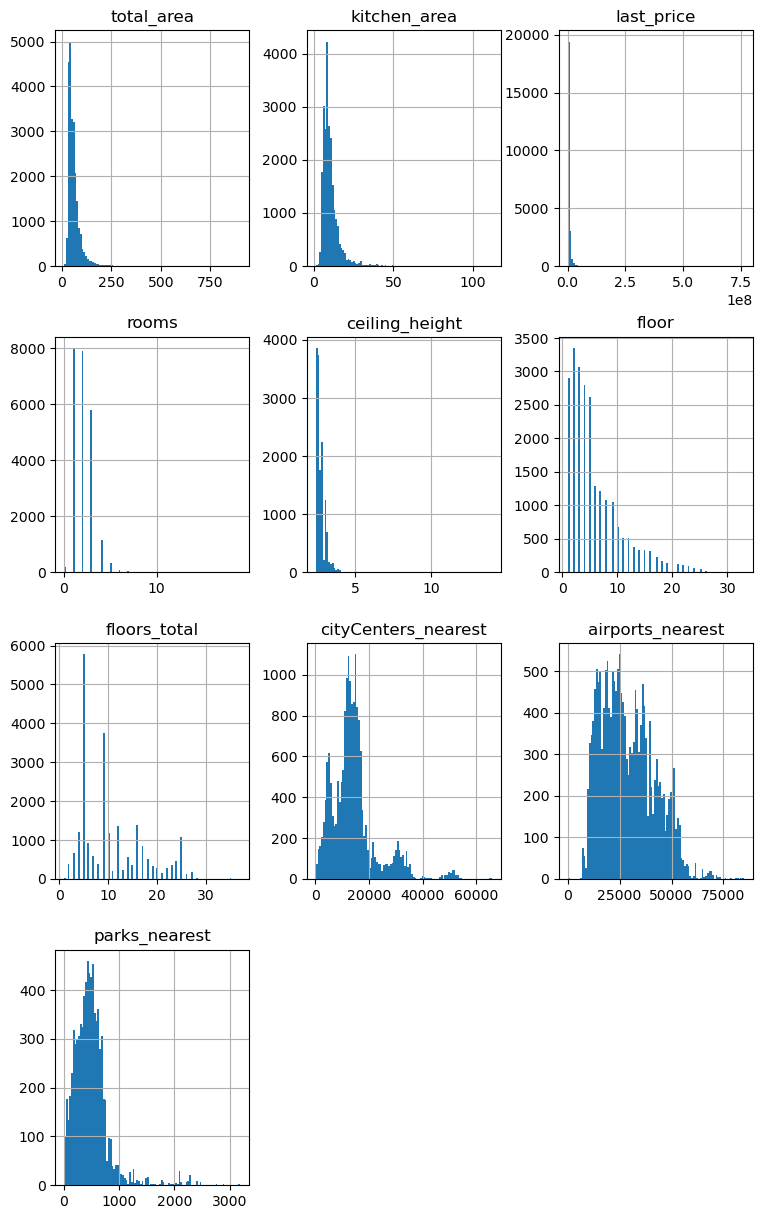

In [84]:
data_to_hist.hist(bins=100, figsize=(9, 15))

`total_area` - мы видим нормальную картину, большинство квартир имеют площадь до 60-70 кв.м  
`kitchen_area` - площадь кухни пропорциональна площади квартиры, поэтому данные гистограммы очень похожи.  
`last_price` - используя функцию describe() можно сказать, что стредняя стоимость квартиры составляет 6.5 млн. рублей. Минимальная стоимость, после удаления анамалий, составляет 430 тыс.рублей, что вполне может соответствовать стоимости комнаты в области. Максимальная же стоимость тоже может соответствовать действительности, т.к. например на Циан можно встретить квартиры стоимостью 1 млрд. и площадью более 900 кв.м.  
`rooms` - можно сказать, что чаще всего на рынке встречаются квартиры с 1-2 комнатами.  
`ceiling_height` - средняя высота потолков соответствует реальности и составляет 2,7 метра. Значения выше встречаются редко, так как относятся к объектам элитной недвижимости.  
`floor` - наибольшее количество квартир находится ниже 6-го этажа, это можно объяснить типовой 5-ти и 9-ти этажной застройкой.
`floors_total` - заметны скачки на уровне 5-ти и 9-ти этажей, что подтверждает тезис выше.  
`cityCenters_nearest` - из уже проведенного анализ ясно, что наибольшее количесво объявлений размещенно в самом городе, а не в области. По данным из интернета, протяженность СПб с севера на юг -32 км. Поэтому пик гистограммы в районе 15 км вполне понятен.  
`airports_nearest` - данная гистограмма не имеет четких контуров и пиков, это можно объяснить тем, что в городе всего 1 аэропорт. Соответственно разброст расстояний может быть абсолютно любой. Например, аэропорт может находиться гораздо ближе к населенному пункту в области, который находится на юге, чем к квартире в центре города или на севере.  
`parks_nearest` - для парков картина совершенно иная, чем для аэропортов, потому что парков много. Мы можем наблюдать, что чаще всего можно найти парк в радиусе 500 метров примерно, что вполне соответствует реальности.  
`weekday_exposition`и `month_exposition` - описание данных столбцов сделаем позже, на этапе анализа зависимости стоимости от данных аоказателей.

#### 2. Изучим как быстро продавались квартиры


Text(0, 0.5, 'Количество объявлений')

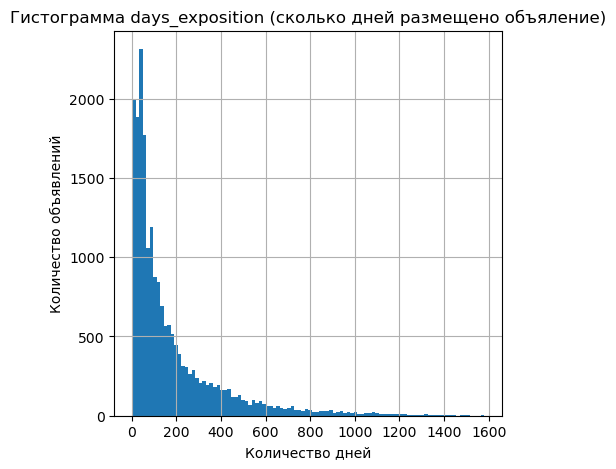

In [85]:
data['days_exposition'].hist(bins=100, figsize=(5, 5))
plt.title('Гистограмма days_exposition (сколько дней размещено объяление)')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')

In [86]:
data['days_exposition'].describe()

count    20391.000000
mean       180.757246
std        219.743536
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество объявлений')

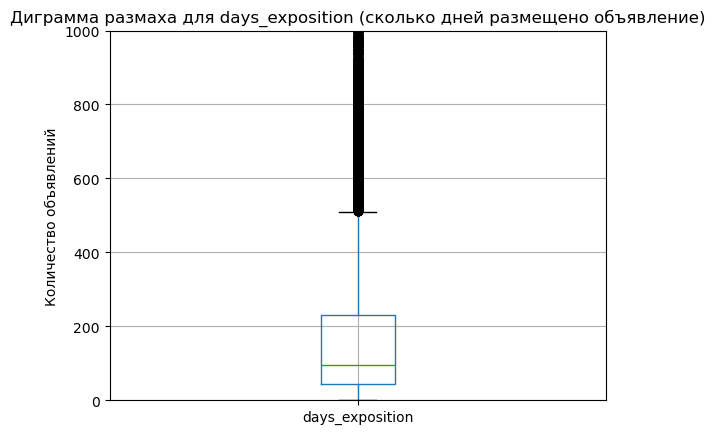

In [87]:
data.boxplot(column='days_exposition')
plt.ylim(0, 1000)
plt.title('Диграмма размаха для days_exposition (сколько дней размещено объявление)')
plt.ylabel('Количество объявлений')

In [88]:
# Количество значений выше среднего
data.loc[data['days_exposition'] > 181, 'days_exposition'].count()

6376

Опираясь на полученные данные, можно сказать, что продажа квартиры будет считаться быстрой, если она была продана менее чем за 95 дней (3 месяца). 95 дней - это медианное значение. Медленной продажей можно назвать ту продажу, которая длилась больше значения третьего квантиля: 231 день (почти 8 месяцев).

#### 3. Выясним какие факторы больше всего влияют на общую стоимость


Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим, зависит ли цена от:  
общей площади;  
жилой площади;  
площади кухни;  
количества комнат;  
этажа, на котором расположена квартира (первый, последний, другой);  
даты размещения (день недели, месяц, год).  
Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией используем сводные таблицы.

Определим выбросы для общей площади

Text(0, 0.5, 'Общая площадь, кв.м')

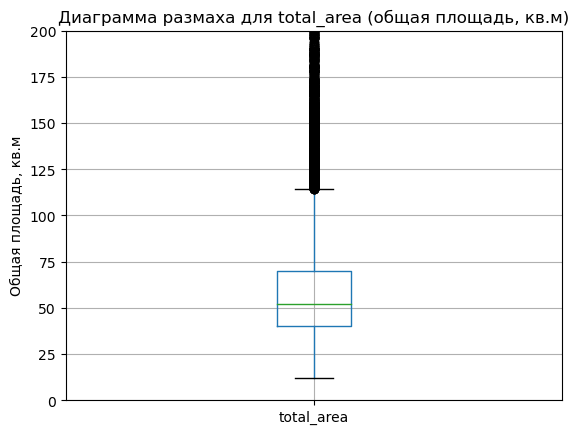

In [89]:
# построим диаграмму размаха для "total_area"
data.boxplot('total_area')
plt.ylim(0, 200)
plt.title('Диаграмма размаха для total_area (общая площадь, кв.м)')
plt.ylabel('Общая площадь, кв.м')

<AxesSubplot: title={'center': 'Зависимость цены от общей площади'}, xlabel='Общая площадь, кв.м', ylabel='Цена'>

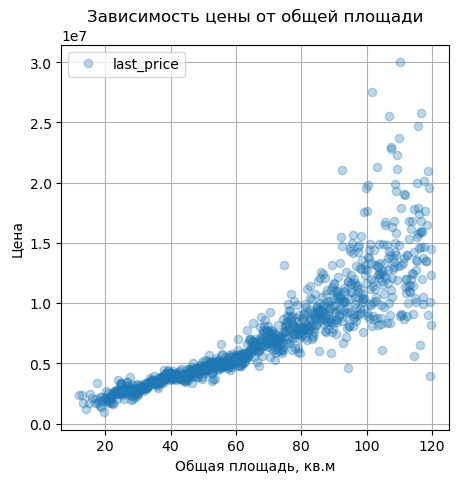

In [90]:
# построим график зависимости цены от общей площади
(data
    .query('total_area < 120 and total_area>10')
    .pivot_table(index='total_area', values='last_price', aggfunc='mean')
    .plot(style='o', grid=True, figsize=(5, 5), alpha=0.3, xlabel='Общая площадь, кв.м', ylabel='Цена',
          title='Зависимость цены от общей площади')
 )

In [91]:
# опредилим коэффициент корреляции общей площади от стоимости квартиры
data['total_area'].corr(data['last_price'])

0.6536850904480331

По диаграмме рассеяния можно явно заметить, что с возрастанием общей площади недвижимости возрастает её цена.  
Корреляция данных величин равна 0,65, что подтверждает наличие связи.

Проведем аналогичные расчеты для жилой прощади.

Text(0, 0.5, 'Жилая площадь, кв.м')

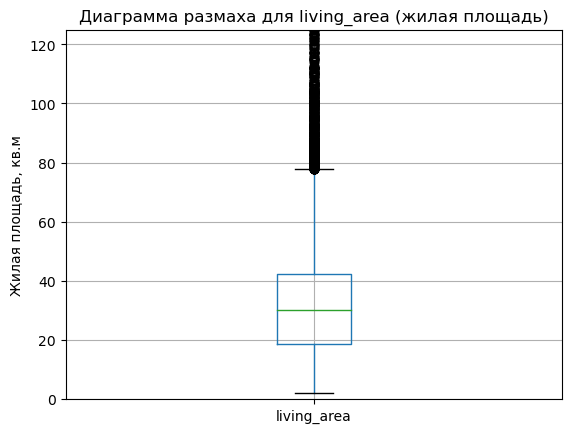

In [92]:
data.boxplot('living_area')
plt.ylim(0, 125)
plt.title('Диаграмма размаха для living_area (жилая площадь)')
plt.ylabel('Жилая площадь, кв.м')

(0.0, 30000000.0)

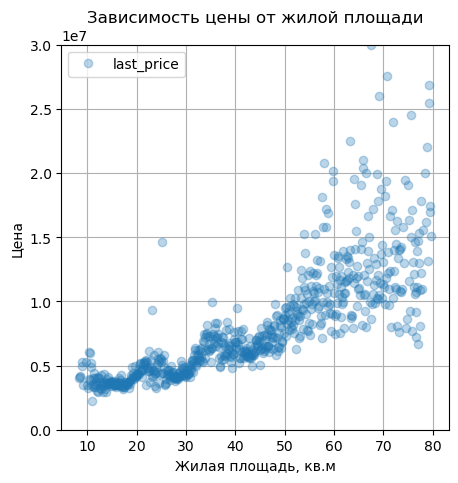

In [93]:
(data
    .query('living_area < 80 and living_area > 8')
    .pivot_table(index='living_area', values='last_price', aggfunc='mean')
    .plot(style='o', grid=True, figsize=(5, 5), alpha=0.3, xlabel='Жилая площадь, кв.м', ylabel='Цена',
          title='Зависимость цены от жилой площади', )
 )
plt.ylim(0, 30000000)

In [94]:
# определим коэффициент корреляции между жилой площадью и стоимостью квартиры
data['living_area'].corr(data['last_price'])

0.5663813897083391

Так как жилая площадь зависит от общей площади, но в разных пропорциях, из-за разного количество вспомогательных помещений в квартире, то диаграмма не такая четкая, как для общей площади, но зависимость прослеживается. И можно сделать вывод, что чем выше жилая площадь, тем выше стоимость квартиры.  
Коэффициент корреляции подтверждает наличие связи, но уже не такой сильной как между общей площадью и ценой.

Text(0, 0.5, 'Площадь кухни, кв.м')

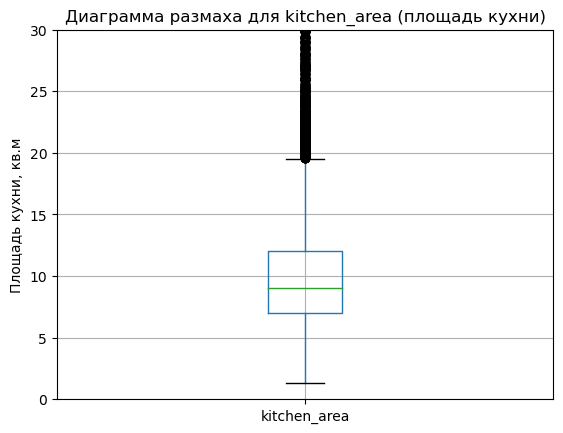

In [95]:
data.boxplot('kitchen_area')
plt.ylim(0, 30)
plt.title('Диаграмма размаха для kitchen_area (площадь кухни)')
plt.ylabel('Площадь кухни, кв.м')

(0.0, 20000000.0)

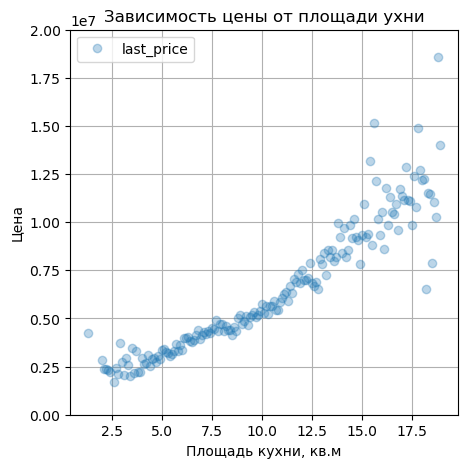

In [96]:
(data
    .query('kitchen_area < 19')
    .pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
    .plot(style='o', grid=True, figsize=(5, 5), alpha=0.3, xlabel='Площадь кухни, кв.м', ylabel='Цена',
          title='Зависимость цены от площади ухни', )
 )
plt.ylim(0, 20000000)

In [97]:
# определим коэффициент корреляции между площадью кухни и стоимостью квартиры
data['kitchen_area'].corr(data['last_price'])

0.5142951824553472

Диаграмма рассеяния для площади кухни более четкая, чем для жилой площади. Это связано с тем, что пропуски в столбце `kitchen_area` были заполнены средним соотношением общей площади квартиры к площади кухни.  
Вывод: чем больше кухня, тем дороже квартира. Обусловлено это все тем же: чем больше общая площадь, тем больше и кухня.  
Коэффициент корреляции данных величин подтверждает наличие связи, однако стоит отметить, что данная чвязь не очень сильная.

Text(0, 0.5, 'Количество комнат')

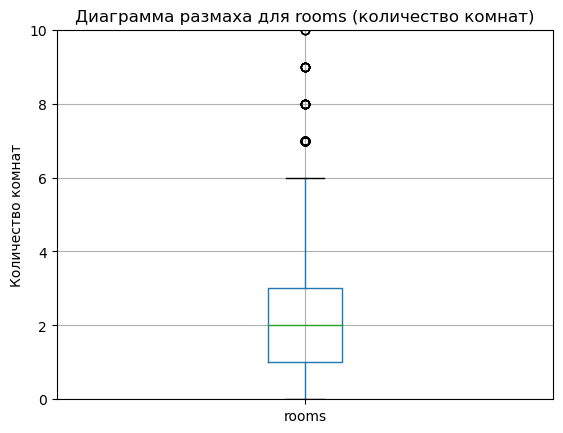

In [98]:
data.boxplot('rooms')
plt.ylim(0, 10)
plt.title('Диаграмма размаха для rooms (количество комнат)')
plt.ylabel('Количество комнат')

<AxesSubplot: title={'center': 'Зависимость цены от количества комнат'}, xlabel='Количество комнат', ylabel='Цена'>

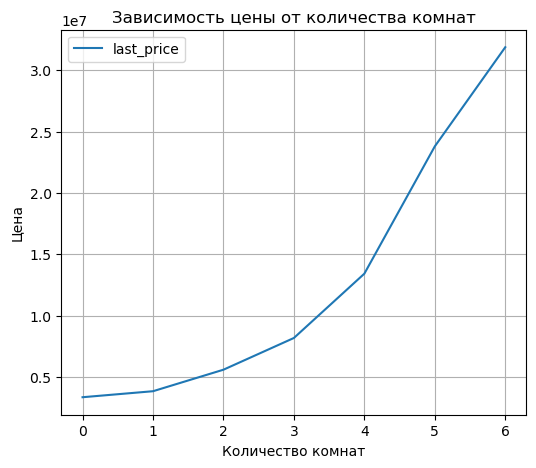

In [99]:
(data
    .query('rooms <= 6')
    .pivot_table(index='rooms', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(6, 5), xlabel='Количество комнат', ylabel='Цена',
          title='Зависимость цены от количества комнат', )
 )

In [100]:
# определим коэффициент корреляции между количеством комнат в квартире и общей стоимостью
data['rooms'].corr(data['last_price'])

0.36318962312522646

Вывод: чем больше комнат в квартире, тем выше её стоимость. Причины этого аналогичны вышеописанным зависимостям: чем больше комнат, там больше общая площадь квартиры (следовательно и жилая площадь и площадь кухни).
Невысокий коэффициент корреляции свидетельствует о слабой корреляции.

<AxesSubplot: title={'center': 'Цена в зависимости от этажа'}, xlabel='Этаж', ylabel='Цена'>

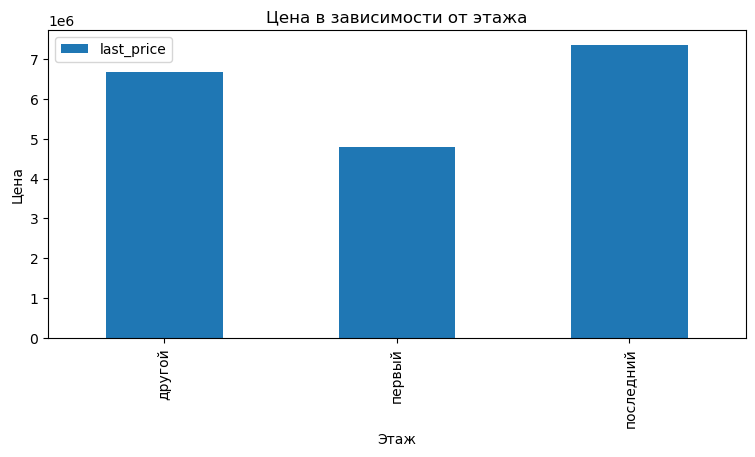

In [101]:
(data
    .pivot_table(index='floor_type', values='last_price', aggfunc='mean')
    .plot(y='last_price', kind='bar', figsize=(9, 4), xlabel='Этаж', ylabel='Цена', title='Цена в зависимости от этажа')
 )

In [102]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')

,last_price
floor_type,
другой,6.674670e+06
первый,4.802604e+06
последний,7.361345e+06


In [103]:
# определим коэффициент корреляции между номером этажа и стоимостью квартиры
data['floor'].corr(data['last_price'])

0.02697486089553834

По диаграмме и сводной таблице заметно, что стоимость квартиры на первом этаже ниже на 35% чем на последнем и 28% чем на "другом". В целом звучит достаточно правдоподобно. На первом этаже гораздо выше уровень шума с улицы, выше риски ограбления и повреждения окон, больше пыли с улицы попадает через открытое окно.  
Коэффициент корреляции считали не для типа этажа (первый, последний или другой), а непосредственного для числового значения. Коэффициент корреляции говорит об очень низкой зависимости, её практически нет.

<AxesSubplot: title={'center': 'Цена в зависимости от дня недели  подачи объявления'}, xlabel='День недели подачи объясления', ylabel='Цена'>

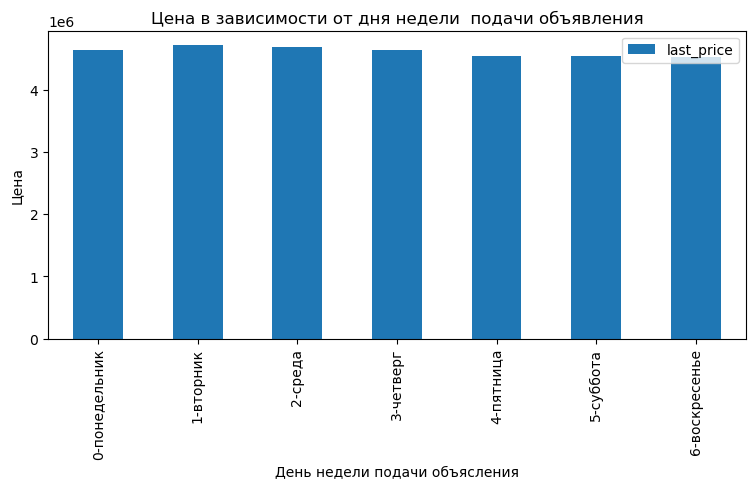

In [104]:
(data
    .pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
    .sort_values(by='weekday_exposition')
    .plot(y='last_price', kind='bar', figsize=(9, 4), xlabel='День недели подачи объясления',
          ylabel='Цена', title='Цена в зависимости от дня недели  подачи объявления')
 )

In [105]:
data.pivot_table(index='weekday_exposition', values='last_price',
                 aggfunc='mean').sort_values(by='last_price', ascending=False)

,last_price
weekday_exposition,
5-суббота,6.986165e+06
3-четверг,6.707446e+06
2-среда,6.631923e+06
0-понедельник,6.519039e+06
1-вторник,6.389281e+06
4-пятница,6.359714e+06
6-воскресенье,6.242137e+06


Стоимость квартиры мало зависит от дня недели, в который было выложено объявление.
Квартиры выставленные на продажу в субботу немного дороже, чем в остальные дни. При этом в воскресенье выкладывают квартиры подешевле.

<AxesSubplot: title={'center': 'Цена в зависимости от месяца подачи объявления'}, xlabel='Месяц подачи объясления', ylabel='Цена'>

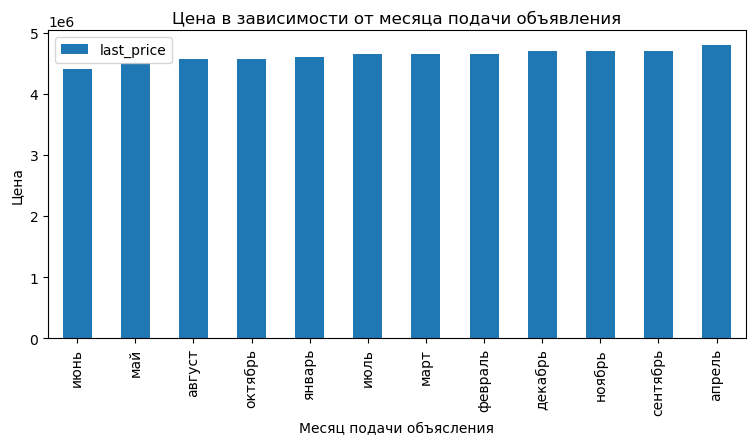

In [106]:
(data
    .pivot_table(index='month_exposition', values='last_price', aggfunc='median')
    .sort_values(by='last_price')
    .plot(y='last_price', kind='bar', figsize=(9, 4), xlabel='Месяц подачи объясления',
          ylabel='Цена', title='Цена в зависимости от месяца подачи объявления')
 )

Зависимость стоимости квартиры от месяца тоже прослеживается слабо. Но как показывает диаграмма: дороже всего оказались апрельскии квартиры.

<AxesSubplot: title={'center': 'Цена в зависимости от года подачи объявления'}, xlabel='Год подачи объявления', ylabel='Цена'>

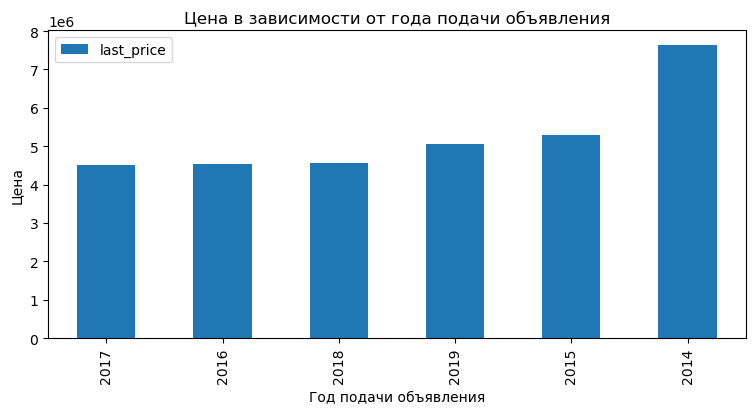

In [107]:
(data
    .pivot_table(index='year_exposition', values='last_price', aggfunc='median')
    .sort_values(by='last_price')
    .plot(y='last_price', kind='bar', figsize=(9, 4), xlabel='Год подачи объявления',
          ylabel='Цена', title='Цена в зависимости от года подачи объявления')
 )

In [108]:
# найдем коэффициент корреляции между годом подачи объявления и общей стоимостью квартиры
data['year_exposition'].corr(data['last_price'])

-0.04281511586216985

Стоимость квартир выставленных на продажу в 2014 году значительно выше. Это может быть обусловлено кризисом, связанным с падением курса рубля. Что подтверждается [анализом ТинькоффЖурнала.](https://journal.tinkoff.ru/nedviga20let-stat/)
Так же в связи с кризисом мог возникнуть ажиотаж на квартиры, т.к по результатам опросов ДОМ.РФ и ВЦИОМ [недвижимость остается самым популярным способом вложения накоплений Россиян.](
https://rg.ru/2022/06/29/rossiiane-predpochitaiut-pokupku-nedvizhimosti-bankovskim-vkladam.html)  

Значение коэффициента корреляции говорит нам, что связи между годом подачи объявления и стоимостью квартиры практически нет.

#### 4. Посчитаем цену квадратного метра для 10 населенных пунктов с наибольшим числом объявлений.
Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [109]:
# Создадим список 10-ти населенных пунктов с наибольшим числом объявлений
top10_list = list(data.groupby('new_locality_name')[
                  'price_for_m2'].count().sort_values(ascending=False)[:10].index)

In [110]:
top10_list

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Парголово',
 'Гатчина',
 'Выборг']

In [111]:
# Создадим новый датафрейм для полученных ранее населенных пунктов
top10_data = data.query('new_locality_name in @top10_list')

<AxesSubplot: title={'center': 'Цена квадратного метра в зависимости от населенного пункта'}, xlabel='Населенный пункт', ylabel='Цена за квадратный метр'>

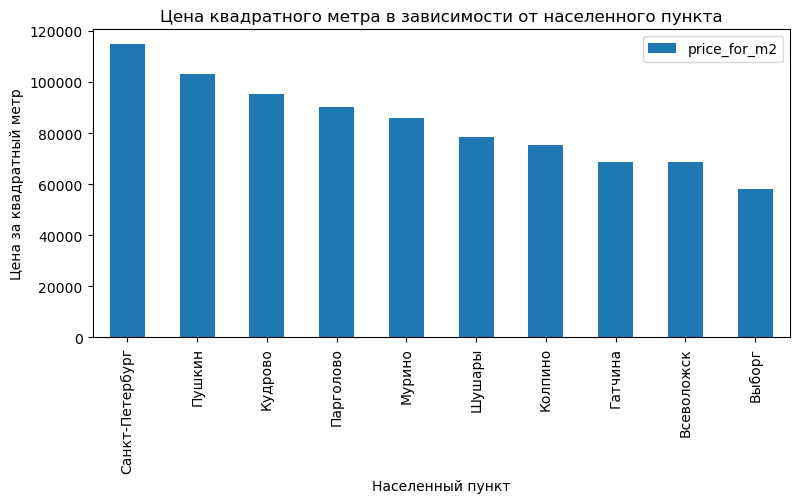

In [112]:
# Построим соответствующий график зависимости
(top10_data
 .pivot_table(index='new_locality_name', values='price_for_m2', aggfunc='mean')
 .sort_values(by='price_for_m2', ascending=False)
 .plot(y='price_for_m2', kind='bar', figsize=(9, 4), xlabel='Населенный пункт',
       ylabel='Цена за квадратный метр', title='Цена квадратного метра в зависимости от населенного пункта')
 )

Данная диаграмма отражает вполне реалистичную картину. Действительно, квартиры в городе дороже, чем в области. И чем дальше от Санкт-Петербурга город, тем квартиры там дешевле. Но это не всегда так. Например Пушкин, который находится за Шушарами "дороже", потому что это парковый город и как говорит [Википедия](https://ru.wikipedia.org/wiki/%D0%9F%D1%83%D1%88%D0%BA%D0%B8%D0%BD_(%D0%B3%D0%BE%D1%80%D0%BE%D0%B4): является крупным туристическим, научным, учебным и военно-промышленным центром, что конечно тоже определяет его ценность на рынке недвижимости.

#### 5. Вычислим среднюю стоимость каждого километра в г. Санкт-Петербург
Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Определим, как стоимость объектов зависит от расстояния до центра города.

In [113]:
# выделим в отдельный датафрейм объявления из Санкт-Петербурга
spb_flats = data.query('locality_name == "Санкт-Петербург"')

<AxesSubplot: title={'center': 'Стоимость квартиры в зависимости от расстояния до центра'}, xlabel='Расстояние (км.)', ylabel='Расстояние от центра'>

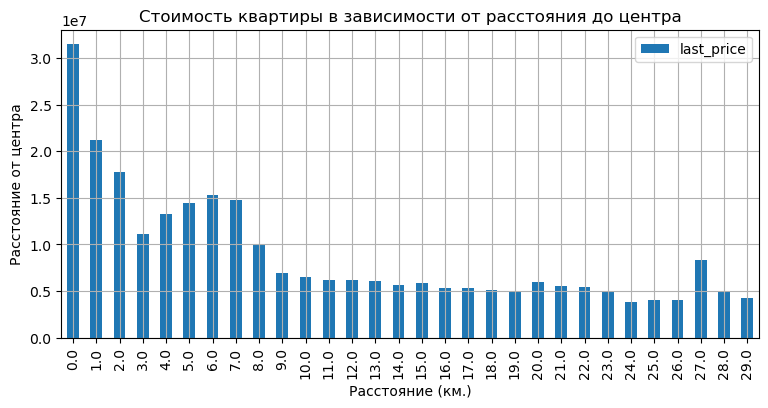

In [114]:
# Построим график зависимости каждого километра
(spb_flats
 .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
 .plot(y='last_price', kind='bar', grid=True, figsize=(9, 4), xlabel='Расстояние (км.)',
       ylabel='Расстояние от центра', title='Стоимость квартиры в зависимости от расстояния до центра')
 )

Ожидаемо, что в самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 20 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра. Предполагаю, что это влияние на чуть более высокую, чем ожидалось, медианную цену оказывают определенные районы типа Василеостровского, Приморского и Петроградского, которые не считаются центральными, но при этом считаются достаточно элитными.

Вполне ожидаемо, что квартиры в самом центре будут иметь среднюю стоимость выше. Значительно падение цен можно наблюдать начиная с 8-го километра. Можно условно сказать, что центр города Санкт-Петербург определяется радиусов в 7 километров.

### Общий вывод

В выводе кратко ответим на вопрос "каки факторы значительнее всего влияют на стоимость недвижимости".

**Площадь недвижимости**	
Чем больше площадь, тем выше цена. Поэтому будет прямая корреляция так же между ценой квартиры и ценой одного квадратного метра (чем больше цена одного квадратного метра, тем больше стоимость квартиры и чем больше квадратных метров у квартиры, тем выше цена).  

**Площадь жилой зоны/кухни"**  
Чем больше жилая площадь, тем выше цена. Аналогично для площади кухни.  
Напрямую с этим звязана зависимость цены от количества комнат: чем больше комнат, тем больше цена.

**Расстояние до центра**   
Чем ближе к центру, тем дороже.

**Этаж**   
На первом этаже квартиры дешевле.

**Год размещения объявления**  
Дороже всего стоили квартиры в 2014 году. Потом, на протяжении 3-х лет наблюдался некоторый спад, после чего цены снова поползли вверх.  
**День и месяц размещения объявления** мало влияют на стоимость недвижимости, лучше опираться на год размещения объявления.  